# Semester Project
### BS Data Science, 4th Semester,
### Group 6.

|  Group Members| Reg. | Role |
|--|--|--|
| Muhammad Ali | 2022-UAM-4627 | *Group Leader |
| Mubeen Asif | 2022-UAM-4601 |  |
| Mubeen Naeem | 2022-UAM-4609 |  |
| Yasir Saeed | 2022-UAM-4642 |  |
| Muhammad Danish | 2022-UAM-4647 |  |


## Project Details.
**Title:** Netflix Movies and TV Shows
**Data Source:** [Kaggle](https://www.kaggle.com/datasets/shivamb/netflix-shows)

> **About this Dataset:** _[Netflix](https://en.wikipedia.org/wiki/Netflix)  is one of the most popular media and video streaming platforms. They have over 8000
> movies or tv shows available on their platform, as of mid-2021, they
> have over 200M Subscribers globally. This tabular dataset consists of
> listings of all the movies and tv shows available on Netflix, along
> with details such as - cast, directors, ratings, release year,
> duration, etc._

## Practical Overview

 - **EDA (Exploratory Data Analysis)**
	 - Data Analysis
	 - Data Processing
	 - Data Visualization 
- **Model Training**
	- Features: 
		- `type , release_year, country, listed_in`
	- Target:
		- `rating`
	- Testing Volume: 20%
	- Training Volume: 80%

- **Machine Learning Models Implementation**
	 - SVM 	(Support Vector Machine)
	 - KNN 	(K-Nearest Neighbor)
	 - Linear Regression 	
	 - Decision Tree
- **Graphical Presentation**
	- SVM, KNN, Decision Tree Accuracy
	- Linear Regression (Actual vs. Predicted) 

## Libraries Uses: 

     - Pandas 
     - Matplotlib 
     - Seaborn 
     - SkLearn


**Importing the libraries.**

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_squared_error


**Reading the dataset.**

In [109]:
data = pd.read_csv('netflix_titles.csv')

# **DATA ANALYSIS**

**Displaying the first few rows of the data.**

In [110]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


**Learning the size of the dataset.**

In [111]:
data.shape

(8807, 12)

**Checking duplicated data.**

In [112]:
data.duplicated().sum()

0

**Learning columns.**

In [113]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

**Check for missing values.**

In [114]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

**Summary statistics.**

In [115]:
data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


# **DATA PREPROCESSING**

**Let's delete the "show_id" column because it is unnecessary.**

In [117]:
data.drop(columns=['show_id'], inplace=True)
data.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


**Filling the NaN data in the "director", "cast" and "country" columns as unknown.**

In [118]:
data['director'] = data['director'].fillna('unknown')
data['cast'] = data['cast'].fillna('unknown')
data['country'] = data['country'].fillna('unknown')

print(data.isnull().sum())
print(data.shape)

type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64
(8807, 11)


**Let's delete the remaining NaN values.**

In [119]:
data.dropna(inplace=True)
print(data.isnull().sum())
print(data.shape)

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64
(8790, 11)


**Let's split the date_added field and get only the year information. Then change the datatype of the year information to int.**

In [120]:
data['added_year'] = data['date_added'].apply(lambda x:x.split(',')[1])
data['added_year'] = data['added_year'].astype(int)
data.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021
1,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021
3,TV Show,Jailbirds New Orleans,unknown,unknown,unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021
4,TV Show,Kota Factory,unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021


**Since there is no need for the date_added column, let's delete it.**

In [121]:
data.drop(columns=['date_added'], inplace=True)
print(data.shape)
data.head()

(8790, 11)


,type,title,director,cast,country,release_year,rating,duration,listed_in,description,added_year
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021
1,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021
3,TV Show,Jailbirds New Orleans,unknown,unknown,unknown,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021
4,TV Show,Kota Factory,unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021


**Let's delete the "added_year" data that is less than the "release_year" data. Because added_year data cannot be greater than release_year data.**

In [122]:
data.drop(data[data['added_year']<data['release_year']].index, inplace=True)
data.shape

(8776, 11)

# **DATA VISUALIZATION**

**Bar chart of the top ten directors with the most movies or TV Shows**

director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Youssef Chahine           12
Martin Scorsese           12
Steven Spielberg          11
Don Michael Paul          10
Name: count, dtype: int64


<AxesSubplot: title={'center': 'DIRECTORS'}, ylabel='director'>

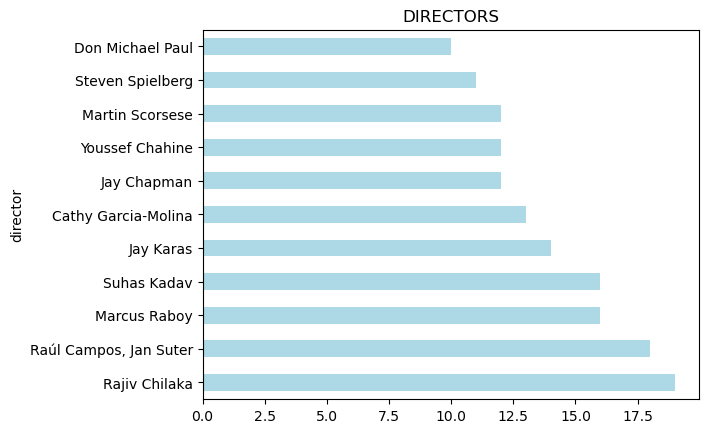

In [123]:
director = data["director"].value_counts()
director_filter = director[director >= 10]
result = director_filter[1:]
print(result)
result.plot.barh(title="DIRECTORS", color="lightblue")

**The top ten countries where the most movies or TV shows were shot.**

country
United States     2803
India              972
United Kingdom     418
Japan              243
South Korea        199
Canada             181
Spain              145
France             123
Mexico             110
Egypt              106
Name: count, dtype: int64


<AxesSubplot: title={'center': 'COUNTRIES'}, xlabel='country'>

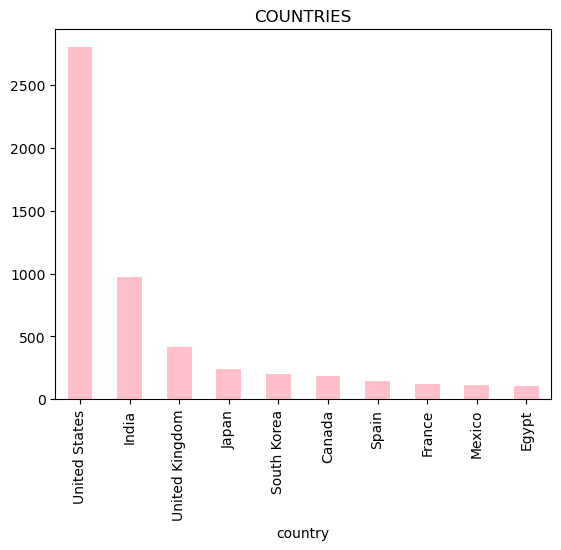

In [124]:
country = data["country"].value_counts()
country_filter = country.drop({"unknown"}).head(10)
print(country_filter)
country_filter.plot.bar(title="COUNTRIES", color="pink")

**Pie and bar chart of the ratios of Movie and TV Show data relative to each other.**

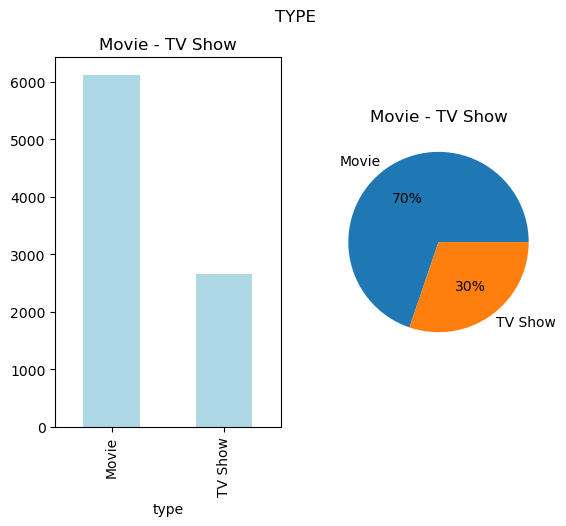

In [125]:
types= data['type'].value_counts()

plt.subplot(1, 2, 1)
types.plot.bar(title="Movie - TV Show", color="lightblue")

plt.subplot(1, 2, 2)
types.plot.pie(title="Movie - TV Show", ylabel="" ,autopct="%.0f%%")

plt.suptitle("TYPE")
plt.show()

**Count-plot of added_year data.**

<AxesSubplot: xlabel='added_year', ylabel='count'>

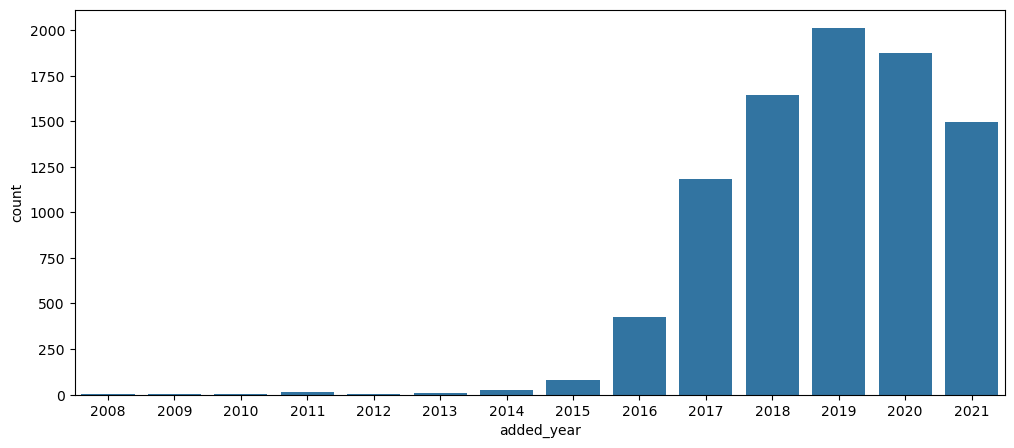

In [126]:
plt.figure(figsize=(12,5))
sns.countplot(x = data['added_year'])

**Count-plot of rating data.**

<AxesSubplot: xlabel='rating', ylabel='count'>

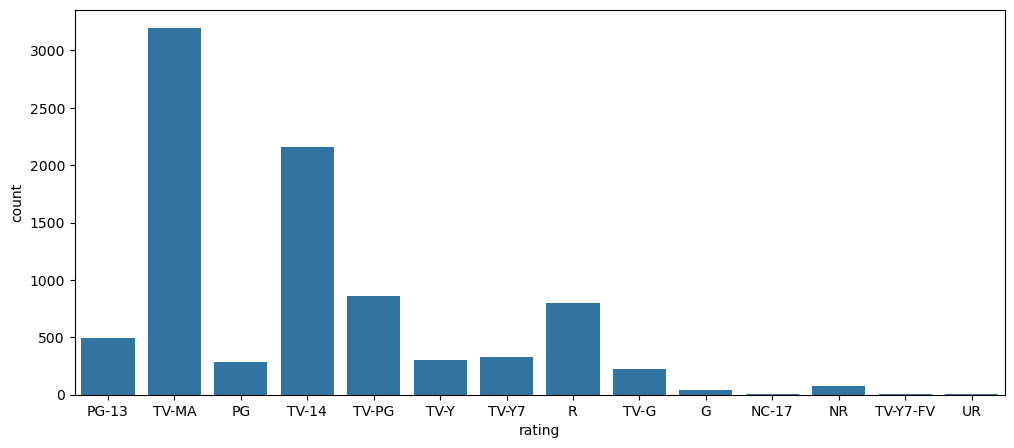

In [127]:
plt.figure(figsize=(12,5))
sns.countplot(x = data['rating'])

**Showing TV Show and Movie data rates for top 10 countries.**

<AxesSubplot: xlabel='country', ylabel='count'>

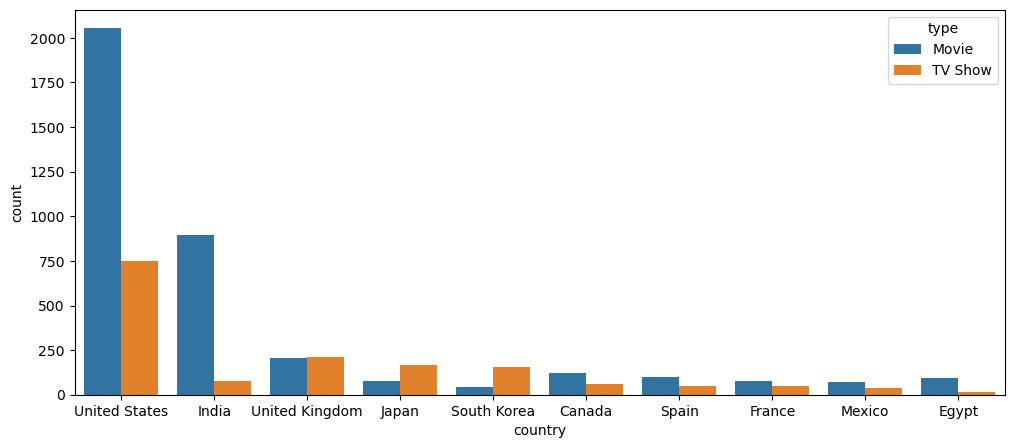

In [128]:
plt.figure(figsize=(12,5))
sns.countplot(x = data['country'], order = country_filter.index, hue = data['type'])

**Training Models**

In [129]:
data = data.dropna(subset=['rating', 'type', 'release_year', 'country', 'listed_in'])  # Drop rows with missing essential values

label_encoder = LabelEncoder()
data['type'] = label_encoder.fit_transform(data['type'])
data['country'] = label_encoder.fit_transform(data['country'])
data['listed_in'] = label_encoder.fit_transform(data['listed_in'])

features = data[['type', 'release_year', 'country', 'listed_in']]
target = data['rating']

target = label_encoder.fit_transform(target)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


**Implementing Models**

**Support Vector Machine (SVM)**

In [130]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Accuracy: {accuracy_svm}')

SVM Accuracy: 0.357630979498861


**Decision Tree**

In [131]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f'Decision Tree Accuracy: {accuracy_tree}')

Decision Tree Accuracy: 0.4715261958997722


**K-Nearest Neighbors (KNN)**

In [132]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'KNN Accuracy: {accuracy_knn}')

KNN Accuracy: 0.4869020501138952


**Plotting accuracy of classification models**

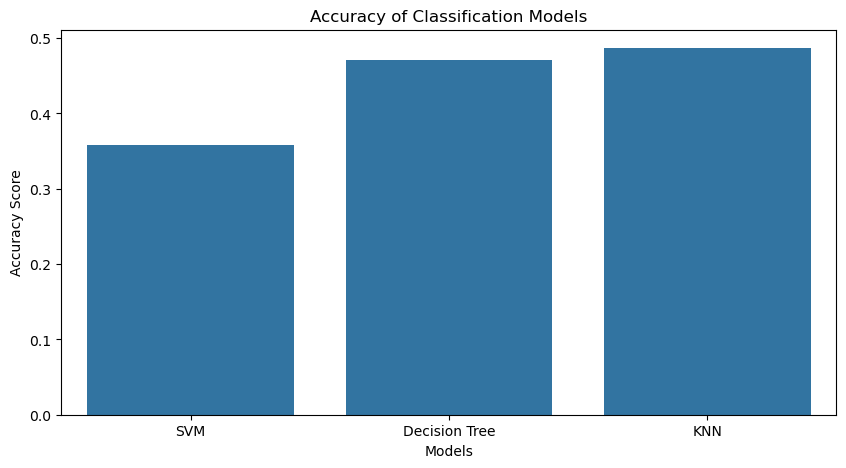

In [133]:
accuracy_scores = [accuracy_svm, accuracy_tree, accuracy_knn]
models = ['SVM', 'Decision Tree', 'KNN']

plt.figure(figsize=(10, 5))
sns.barplot(x=models, y=accuracy_scores)
plt.title('Accuracy of Classification Models')
plt.ylabel('Accuracy Score')
plt.xlabel('Models')
plt.show()

**Linear Regression**

In [134]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f'Linear Regression Mean Squared Error: {mse_linear}')

Linear Regression Mean Squared Error: 3.3101847982629606


**Plotting results for Linear Regression**

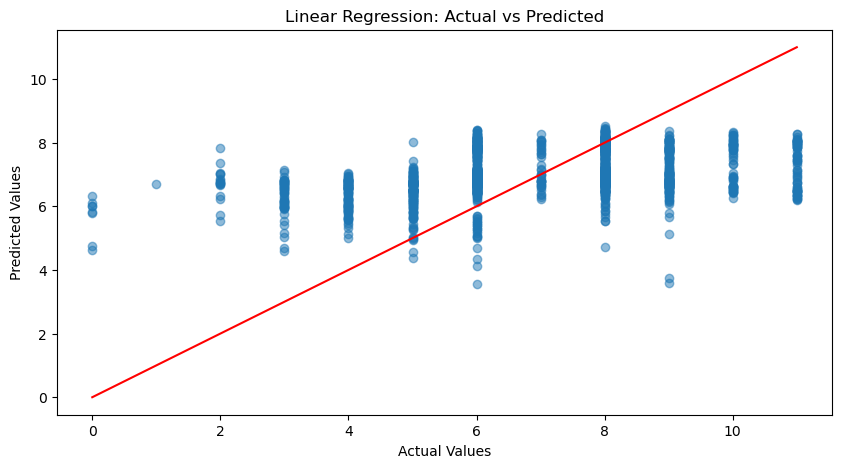

In [135]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_linear, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line of best fit
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()